In [11]:
#Importing needed libraries for our model
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data = pd.read_csv("/content/drive/MyDrive/broad_hackathon/data/HDAC_final_dataset_descriptors.csv")

In [5]:
data

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.602060
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,9.000000
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,9.000000
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.698970
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.698970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8867,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.716021
8868,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.877456
8869,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.063486
8870,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.456056


In [51]:
X = data.drop("pIC50", axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8867,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8868,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8869,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8870,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [52]:
Y = data.pIC50
Y

,pIC50
0,8.60
1,9.00
2,9.00
3,6.70
4,5.70
...,...
8867,6.72
8868,6.88
8869,7.06
8870,6.46


In [53]:
print(X.shape, Y.shape)

(8872, 881) (8872,)


In [54]:
#removing the low varianc features from the dataset
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1-.8)))
X=selection.fit_transform(X)
X.shape

(8872, 132)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 1, ..., 1, 0, 0],
       ...,
       [1, 0, 1, ..., 1, 0, 1],
       [1, 1, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 0, 0, 0]])

In [12]:
#Data split for training and testing
np.random.seed(126)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

print(X_train.shape, Y_train.shape)

(7097, 132) (7097,)


In [13]:
print(X_test.shape, Y_test.shape)

(1775, 132) (1775,)


In [14]:
import numpy as np

np.random.seed(126)
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2=model.score(X_test, Y_test)
r2

0.37226237365308934

In [76]:
import pickle

with open("/content/drive/MyDrive/broad_hackathon/data/rf-model1-qsar.pkl", "wb") as f:
    pickle.dump(model, f)

In [15]:
!pip install lazypredict

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.7/24.7 MB 41.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 81.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.7/242.7 kB 24.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 733.8/733.8 kB 45.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 22.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.5/118.5 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.2/196.2 kB 20.1 MB/s eta 0:00:00


In [16]:
import lazypredict
from lazypredict.Supervised import LazyRegressor

In [17]:
clf = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
train, test = clf.fit(X_train, X_test, Y_train, Y_test)

  0%|          | 0/42 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006504 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 396
[LightGBM] [Info] Number of data points in the train set: 7097, number of used features: 132
[LightGBM] [Info] Start training from score 6.524963


In [18]:
train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
RandomForestRegressor,0.33,0.38,1.01,10.40
HistGradientBoostingRegressor,0.32,0.37,1.01,1.56
LGBMRegressor,0.32,0.37,1.02,0.69
XGBRegressor,0.31,0.36,1.02,0.52
NuSVR,0.30,0.35,1.03,6.77
SVR,0.30,0.35,1.03,8.19
BaggingRegressor,0.29,0.34,1.04,0.98
KNeighborsRegressor,0.25,0.31,1.06,0.24
MLPRegressor,0.25,0.30,1.07,17.12


In [19]:
test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
RandomForestRegressor,0.33,0.38,1.01,10.40
HistGradientBoostingRegressor,0.32,0.37,1.01,1.56
LGBMRegressor,0.32,0.37,1.02,0.69
XGBRegressor,0.31,0.36,1.02,0.52
NuSVR,0.30,0.35,1.03,6.77
SVR,0.30,0.35,1.03,8.19
BaggingRegressor,0.29,0.34,1.04,0.98
KNeighborsRegressor,0.25,0.31,1.06,0.24
MLPRegressor,0.25,0.30,1.07,17.12


# Model 2.0

In [30]:
#Loading in metadata for chemicals
full_data = pd.read_csv("/content/drive/MyDrive/broad_hackathon/data/HDAC_data_RAW.csv")
filtered_data = pd.read_csv("/content/drive/MyDrive/broad_hackathon/data/HDAC_data_pIC50.csv")

In [21]:
full_data.columns

Index(['Unnamed: 0', 'action_type', 'activity_comment', 'activity_id',
       'activity_properties', 'assay_chembl_id', 'assay_description',
       'assay_type', 'assay_variant_accession', 'assay_variant_mutation',
       'bao_endpoint', 'bao_format', 'bao_label', 'canonical_smiles',
       'data_validity_comment', 'data_validity_description',
       'document_chembl_id', 'document_journal', 'document_year',
       'ligand_efficiency', 'molecule_chembl_id', 'molecule_pref_name',
       'parent_molecule_chembl_id', 'pchembl_value', 'potential_duplicate',
       'qudt_units', 'record_id', 'relation', 'src_id', 'standard_flag',
       'standard_relation', 'standard_text_value', 'standard_type',
       'standard_units', 'standard_upper_value', 'standard_value',
       'target_chembl_id', 'target_organism', 'target_pref_name',
       'target_tax_id', 'text_value', 'toid', 'type', 'units', 'uo_units',
       'upper_value', 'value'],
      dtype='object')

In [22]:
!pip install sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 51.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 56.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 86.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [31]:
downsampled_meta = full_data[full_data["molecule_chembl_id"].isin(filtered_data["molecule_chembl_id"])]
downsampled_meta

,Unnamed: 0,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,0,NaN,NaN,114830,[],CHEMBL701994,Inhibitory activity against human Histone deac...,B,NaN,NaN,...,Homo sapiens,Histone deacetylase 1,9606,NaN,NaN,IC50,nM,UO_0000065,NaN,2.50
1,1,NaN,NaN,121066,[],CHEMBL701994,Inhibitory activity against human Histone deac...,B,NaN,NaN,...,Homo sapiens,Histone deacetylase 1,9606,NaN,NaN,IC50,nM,UO_0000065,NaN,1.00
2,2,NaN,NaN,130009,[],CHEMBL701994,Inhibitory activity against human Histone deac...,B,NaN,NaN,...,Homo sapiens,Histone deacetylase 1,9606,NaN,NaN,IC50,nM,UO_0000065,NaN,1.00
3,3,NaN,NaN,134954,[],CHEMBL701994,Inhibitory activity against human Histone deac...,B,NaN,NaN,...,Homo sapiens,Histone deacetylase 1,9606,NaN,NaN,IC50,nM,UO_0000065,NaN,200.00
4,4,NaN,NaN,145537,[],CHEMBL701995,Inhibitory concentration against human Histone...,B,NaN,NaN,...,Homo sapiens,Histone deacetylase 1,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,2.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9076,9076,"{'action_type': 'INHIBITOR', 'description': 'N...",NaN,25731082,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5393274,Inhibition of C-terminal 6His tagged human rec...,B,NaN,NaN,...,Homo sapiens,Histone deacetylase 1,9606,NaN,NaN,IC50,nM,UO_0000065,NaN,192.30
9078,9078,"{'action_type': 'INHIBITOR', 'description': 'N...",NaN,25731084,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5393274,Inhibition of C-terminal 6His tagged human rec...,B,NaN,NaN,...,Homo sapiens,Histone deacetylase 1,9606,NaN,NaN,IC50,nM,UO_0000065,NaN,132.60
9081,9081,"{'action_type': 'INHIBITOR', 'description': 'N...",NaN,25731087,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5393274,Inhibition of C-terminal 6His tagged human rec...,B,NaN,NaN,...,Homo sapiens,Histone deacetylase 1,9606,NaN,NaN,IC50,nM,UO_0000065,NaN,86.40
9084,9084,"{'action_type': 'INHIBITOR', 'description': 'N...",NaN,25731090,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5393274,Inhibition of C-terminal 6His tagged human rec...,B,NaN,NaN,...,Homo sapiens,Histone deacetylase 1,9606,NaN,NaN,IC50,nM,UO_0000065,NaN,349.90


In [32]:
downsampled_meta = downsampled_meta[downsampled_meta["standard_value"].notna()]
downsampled_meta = downsampled_meta[downsampled_meta["standard_value"] != 0]
downsampled_meta.shape

(8872, 47)

In [33]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sentence_transformers import SentenceTransformer
import torch

# -------------------------
# CONFIG
# -------------------------
TEXT_COLUMNS = ["assay_description"]
CATEGORICAL_COLUMNS = ["assay_type", "bao_endpoint", "bao_format", "target_organism", "standard_type", "standard_units", "standard_relation"]
NUMERICAL_COLUMNS = ["ligand_efficiency"]
TEXT_MODEL_NAME = "all-MiniLM-L6-v2"

model = SentenceTransformer(TEXT_MODEL_NAME)

print("Generating text embeddings...")
text_embeddings = []
for col in TEXT_COLUMNS:
    texts = downsampled_meta[col].fillna("").tolist()
    embeddings = model.encode(texts, batch_size=32, show_progress_bar=True)
    text_embeddings.append(embeddings)
text_embeddings = np.concatenate(text_embeddings, axis=1)



Generating text embeddings...


Batches:   0%|          | 0/278 [00:00<?, ?it/s]

In [38]:
(text_embeddings.shape)

(8872, 384)

In [39]:
embedding_cols = [f"text_emb_{i}" for i in range(text_embeddings.shape[1])]
text_emb_df = pd.DataFrame(text_embeddings, columns=embedding_cols)
text_emb_df

,text_emb_0,text_emb_1,text_emb_2,text_emb_3,text_emb_4,text_emb_5,text_emb_6,text_emb_7,text_emb_8,text_emb_9,...,text_emb_374,text_emb_375,text_emb_376,text_emb_377,text_emb_378,text_emb_379,text_emb_380,text_emb_381,text_emb_382,text_emb_383
0,-0.03,-0.00,-0.03,-0.01,-0.07,-0.01,0.05,-0.03,-0.11,-0.00,...,-0.02,0.04,-0.04,-0.02,-0.02,-0.03,0.06,-0.03,0.07,-0.09
1,-0.03,-0.00,-0.03,-0.01,-0.07,-0.01,0.05,-0.03,-0.11,-0.00,...,-0.02,0.04,-0.04,-0.02,-0.02,-0.03,0.06,-0.03,0.07,-0.09
2,-0.03,-0.00,-0.03,-0.01,-0.07,-0.01,0.05,-0.03,-0.11,-0.00,...,-0.02,0.04,-0.04,-0.02,-0.02,-0.03,0.06,-0.03,0.07,-0.09
3,-0.03,-0.00,-0.03,-0.01,-0.07,-0.01,0.05,-0.03,-0.11,-0.00,...,-0.02,0.04,-0.04,-0.02,-0.02,-0.03,0.06,-0.03,0.07,-0.09
4,0.00,-0.01,-0.04,-0.01,-0.07,-0.01,0.08,-0.01,-0.10,-0.01,...,-0.02,0.03,-0.03,-0.01,-0.06,-0.04,0.09,-0.01,0.05,-0.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8867,0.01,-0.06,-0.05,-0.02,0.04,-0.02,-0.01,0.08,-0.06,0.04,...,0.00,-0.02,0.03,-0.01,0.04,0.03,0.01,0.05,0.08,-0.00
8868,0.01,-0.06,-0.05,-0.02,0.04,-0.02,-0.01,0.08,-0.06,0.04,...,0.00,-0.02,0.03,-0.01,0.04,0.03,0.01,0.05,0.08,-0.00
8869,0.01,-0.06,-0.05,-0.02,0.04,-0.02,-0.01,0.08,-0.06,0.04,...,0.00,-0.02,0.03,-0.01,0.04,0.03,0.01,0.05,0.08,-0.00
8870,0.01,-0.06,-0.05,-0.02,0.04,-0.02,-0.01,0.08,-0.06,0.04,...,0.00,-0.02,0.03,-0.01,0.04,0.03,0.01,0.05,0.08,-0.00


In [42]:
#Removing low variance columns
from sklearn.feature_selection import VarianceThreshold

selection = VarianceThreshold(threshold=1e-5)  # much smaller
text_emb_reduced = selection.fit_transform(text_emb_df)
print(text_emb_reduced.shape)

(8872, 381)


In [59]:
print(X.shape, text_emb_reduced.shape)

(8872, 132) (8872, 381)


In [60]:
merged_array = np.hstack([X, text_emb_reduced])
merged_df = pd.DataFrame(merged_array)
print(merged_df.shape)

(8872, 513)


In [61]:
merged_df

,0,1,2,3,4,5,6,7,8,9,...,503,504,505,506,507,508,509,510,511,512
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,-0.02,0.04,-0.04,-0.02,-0.02,-0.03,0.06,-0.03,0.07,-0.09
1,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,-0.02,0.04,-0.04,-0.02,-0.02,-0.03,0.06,-0.03,0.07,-0.09
2,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,...,-0.02,0.04,-0.04,-0.02,-0.02,-0.03,0.06,-0.03,0.07,-0.09
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,...,-0.02,0.04,-0.04,-0.02,-0.02,-0.03,0.06,-0.03,0.07,-0.09
4,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,...,-0.02,0.03,-0.03,-0.01,-0.06,-0.04,0.09,-0.01,0.05,-0.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8867,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,...,0.00,-0.02,0.03,-0.01,0.04,0.03,0.01,0.05,0.08,-0.00
8868,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,...,0.00,-0.02,0.03,-0.01,0.04,0.03,0.01,0.05,0.08,-0.00
8869,1.00,0.00,1.00,1.00,1.00,1.00,0.00,0.00,1.00,1.00,...,0.00,-0.02,0.03,-0.01,0.04,0.03,0.01,0.05,0.08,-0.00
8870,1.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,...,0.00,-0.02,0.03,-0.01,0.04,0.03,0.01,0.05,0.08,-0.00


In [67]:
merged_df.to_csv("/content/drive/MyDrive/broad_hackathon/data/HDAC_descriptors_with_text_embeddings.csv")

In [62]:
#Data split for training and testing
np.random.seed(126)
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(merged_df, Y, test_size=0.2)

print(X_train2.shape, Y_train2.shape)

(7097, 513) (7097,)


In [63]:
import numpy as np

np.random.seed(126)
model2 = RandomForestRegressor(n_estimators=100)
model2.fit(X_train2, Y_train2)
r2=model2.score(X_test2, Y_test2)
r2

0.5358244146013629

In [75]:
import pickle

with open("/content/drive/MyDrive/broad_hackathon/data/rf-model2-qsar.pkl", "wb") as f:
    pickle.dump(model2, f)

In [64]:
clf2 = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
train2, test2 = clf2.fit(X_train2, X_test2, Y_train2, Y_test2)

  0%|          | 0/42 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.070783 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 95807
[LightGBM] [Info] Number of data points in the train set: 7097, number of used features: 513
[LightGBM] [Info] Start training from score 6.524963


In [65]:
train2

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
LGBMRegressor,0.37,0.55,0.85,10.11
HistGradientBoostingRegressor,0.37,0.55,0.86,10.48
RandomForestRegressor,0.34,0.53,0.87,175.16
XGBRegressor,0.32,0.52,0.89,15.02
SVR,0.30,0.50,0.90,27.55
NuSVR,0.30,0.50,0.90,21.57
KNeighborsRegressor,0.29,0.50,0.91,0.94
BaggingRegressor,0.26,0.47,0.93,17.29
Ridge,0.24,0.46,0.94,0.29


In [68]:
test2

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
LGBMRegressor,0.37,0.55,0.85,10.11
HistGradientBoostingRegressor,0.37,0.55,0.86,10.48
RandomForestRegressor,0.34,0.53,0.87,175.16
XGBRegressor,0.32,0.52,0.89,15.02
SVR,0.30,0.50,0.90,27.55
NuSVR,0.30,0.50,0.90,21.57
KNeighborsRegressor,0.29,0.50,0.91,0.94
BaggingRegressor,0.26,0.47,0.93,17.29
Ridge,0.24,0.46,0.94,0.29


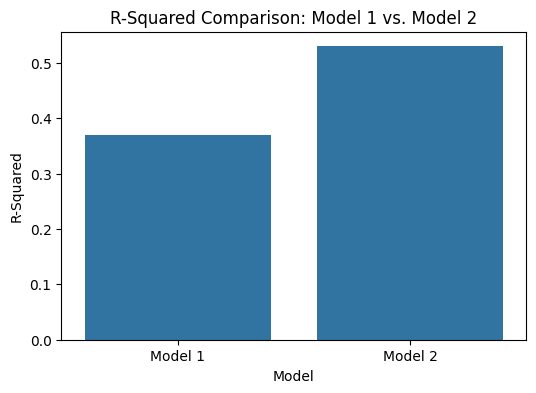

In [74]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


r2_data = {'Model': ['Model 1', 'Model 2'], 'R-Squared': [0.37, 0.53]}
r2_df = pd.DataFrame(r2_data)


plt.figure(figsize=(6, 4))
sns.barplot(x='Model', y='R-Squared', data=r2_df)
plt.title('R-Squared Comparison: Model 1 vs. Model 2')
plt.ylabel('R-Squared')
plt.savefig('/content/drive/MyDrive/broad_hackathon/data/r2_comparisons.png')
plt.show()